In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sqlite3

# connect to SQLite database
conn = sqlite3.connect('snic_provincias.db')


In [339]:
# query the database with type wanted
query = """
    SELECT provincia_nombre AS Provincia, anio AS Año, codigo_delito_snic_nombre AS Tipo,
        cantidad_victimas AS Victimas, tasa_victimas AS Tasa
    FROM prov_stats
    WHERE Año = 2022 AND Tipo = 'Homicidios dolosos'
    ORDER BY Tasa DESC
    """

df = pd.read_sql_query(query, conn)
df

,Provincia,Año,Tipo,Victimas,Tasa
0,Santa Fe,2022,Homicidios dolosos,409,11.392761
1,Chubut,2022,Homicidios dolosos,36,5.631212
2,Misiones,2022,Homicidios dolosos,71,5.510386
3,Neuquén,2022,Homicidios dolosos,36,5.288471
4,Formosa,2022,Homicidios dolosos,31,5.043061
5,Tucumán,2022,Homicidios dolosos,82,4.728629
6,Buenos Aires,2022,Homicidios dolosos,740,4.139688
7,Chaco,2022,Homicidios dolosos,49,3.991086
8,Santa Cruz,2022,Homicidios dolosos,14,3.647477
9,Salta,2022,Homicidios dolosos,53,3.631684


### Estimates of Location: key ideas
- The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual
distributions and hence are more robust.

In [340]:
# Intentional homicide rate Mean
df['Tasa'].mean()

3.6468058041666667

In [341]:
# Intentional homicide rate Median
df['Tasa'].median()

3.2354219

In [342]:
# Intentional homicide rate Trimmed Mean
# good idea to exclude the Santa Fe outlier
scipy.stats.trim_mean(df['Tasa'], 0.1)

3.3942482849999998

### Estimates of Variability: key ideas
- Variance and standard deviation are the most widespread and routinely reported
statistics of variability.
- Both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation
from the median, and percentiles (quantiles).

In [343]:
# Intentional homicide rate Standard Deviation
df['Tasa'].std()
# variance is the same squared

2.070332627249644

In [344]:
# Intentional homicide rate IQR
# it is not sensitive to the Santa Fe outlier so its smaller than STD
df['Tasa'].quantile(0.75) - df['Tasa'].quantile(0.25) 
# the MAD is calculated in R

1.9102415249999996

### Data distribution: key ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a histogram.
- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).

In [345]:
# Percentiles / quantiles
quantiles = df['Tasa'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
quantiles.to_frame().transpose()

,0.05,0.25,0.50,0.75,0.95
Tasa,1.582775,2.376682,3.235422,4.286923,5.613088


Text(0, 0.5, 'Intentional homicide rate')

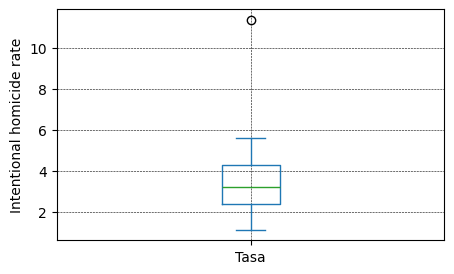

In [346]:
# homicide rate Boxplot
ax = (df['Tasa']).plot.box(figsize=(5,3))
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_ylabel('Intentional homicide rate')

The _whiskers_ will not go beyond 1.5 times the IQR. The green line is the median, the top and bottom of the box are the .25 and .75 quantiles. The dot from upside is the Santa Fe outlier.

In [347]:
# homicide rate Frecuency table
freq = pd.cut(df['Tasa'], 5).value_counts() # divide it into 5 equal size segments
freq.to_frame().transpose().sort_index(axis=1)

Tasa,"(1.118, 3.181]","(3.181, 5.234]","(5.234, 7.287]","(7.287, 9.34]","(9.34, 11.393]"
count,12,8,3,0,1


Text(0.5, 0, 'Intentional homicide rate')

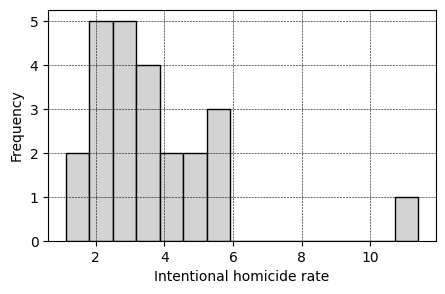

In [348]:
# homicide rate Histogram, showing the frecuency of each interval value
ax = (df['Tasa']).plot.hist(figsize=(5,3), bins=15,
                            color="lightgray", edgecolor="black")
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_xlabel("Intentional homicide rate")

Text(0.5, 0, 'Intentional homicide rate')

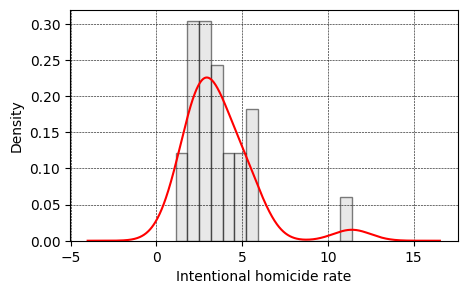

In [349]:
# homicide rate Density plot
ax = (df['Tasa']).plot.hist(density=True, figsize=(5,3), bins=15, 
                            color="lightgray", edgecolor="black", alpha=0.5)
(df['Tasa']).plot.density(ax=ax, color="red")
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_xlabel("Intentional homicide rate")

### Binary and Categorical Data: key ideas
- Categorical data is typically summed up in proportions and can be visualized in a bar chart.
- Categories might represent distinct things (different crime categories, male and female, etc), levels of a factor variable (low, medium, and high), or numeric data that has been binned.
- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels

In [350]:
# Select all the crimes categories from CABA
query = """
    SELECT provincia_nombre AS Provincia, anio AS Año, codigo_delito_snic_nombre AS Tipo,
        cantidad_hechos AS Hechos
    FROM prov_stats
    WHERE Año = 2022 AND Tipo LIKE 'Delitos%' AND Provincia = 'CABA'
    """

df = pd.read_sql_query(query, conn)
df

,Provincia,Año,Tipo,Hechos
0,CABA,2022,Delitos contra el honor,40
1,CABA,2022,Delitos contra el estado civil,1
2,CABA,2022,Delitos contra la seguridad pública,683
3,CABA,2022,Delitos contra el orden público,127
4,CABA,2022,Delitos contra la seguridad de la nación,2
5,CABA,2022,Delitos contra los poderes públicos y el orden...,2
6,CABA,2022,Delitos contra la administración pública,1916
7,CABA,2022,Delitos contra la fe pública,629
8,CABA,2022,Delitos migratorios,1
9,CABA,2022,Delitos contra el orden económico y financiero,44


Text(0, 0.5, 'Cantidad de hechos')

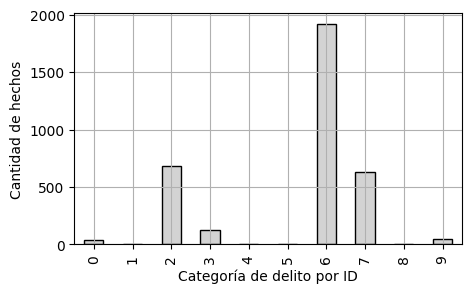

In [351]:
# Crime category bar chart
ax = df['Hechos'].plot.bar(figsize=(5,3), color="lightgray", edgecolor="black")
ax.grid(True)
ax.set_xlabel('Categoría de delito por ID')
ax.set_ylabel('Cantidad de hechos')

# the Mode here is the number 6

In [352]:
# Probabilities
prob = df['Hechos'] / sum(df['Hechos'])
prob.name = 'Probability'
prob.to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9
Probability,0.011611,0.00029,0.198258,0.036865,0.000581,0.000581,0.556168,0.182583,0.00029,0.012772


In [353]:
# Expected value
sum(prob * df['Hechos'])

1321.5851959361391

### Correlation

In [354]:
import seaborn as sns

sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv', index_col=0)

# take telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

telecom.corr()
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [355]:
# Next we focus on funds traded on major exchanges (sector == 'etf').

etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


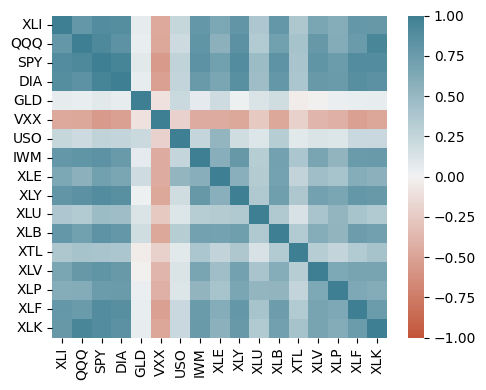

In [356]:

# Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()